In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [16]:

arquivo = '/content/predict_dropout.parquet'

#Upar dataframe


In [19]:
df = pd.read_parquet('predict_dropout.parquet')
df.head()

#Leitura do dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
data = df[['Marital status', 'Nacionality', 'Mother\'s qualification',
           'Father\'s qualification', 'Unemployment rate', 'Inflation rate', 'GDP']]

#Agrupar com base somente em dados sociodemográficos e adaptação

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Normalização dos dados

In [ ]:
inertia = []
k_values = range(1, 11)  # Testar para k de 1 a 10

# Calcular o K-Means para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


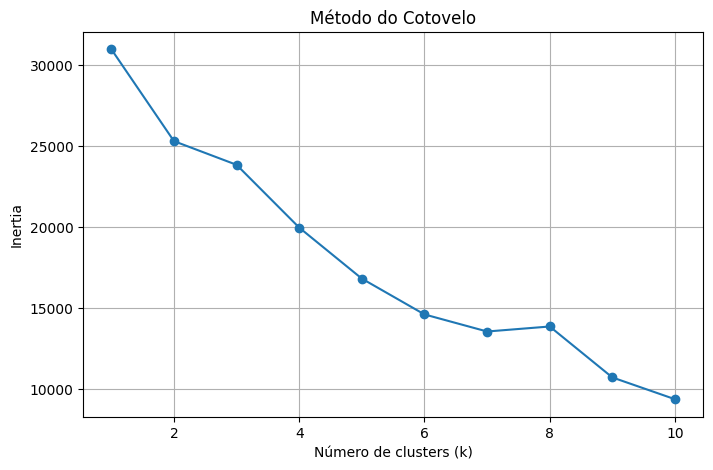

In [ ]:
# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
# Escolher o número de clusters ideal (k)
k = 4

# Aplicar o K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Adicionar os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

# Ver os primeiros resultados
print(df[['Marital status', 'Nacionality', 'Mother\'s qualification',
          'Father\'s qualification', 'Unemployment rate', 'Inflation rate',
          'GDP', 'Cluster']].head())


   Marital status  Nacionality  Mother's qualification  \
0               1            1                      19   
1               1            1                       1   
2               1            1                      37   
3               1            1                      38   
4               2            1                      37   

   Father's qualification  Unemployment rate  Inflation rate   GDP  Cluster  
0                      12               10.8             1.4  1.74        0  
1                       3               13.9            -0.3  0.79        0  
2                      37               10.8             1.4  1.74        1  
3                      37                9.4            -0.8 -3.12        2  
4                      38               13.9            -0.3  0.79        1  


In [ ]:
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)

#Analisando dados agrupados

         Marital status  Application mode  Application order       Course  \
Cluster                                                                     
0              1.056487         18.497207           1.697083  8764.330850   
1              1.271291         18.769231           1.765797  8924.090659   
2              1.234522         17.397749           1.904315  8852.367730   
3              1.217233         19.650485           1.606796  8920.706311   

         Daytime/evening attendance\t  Previous qualification  \
Cluster                                                         
0                            0.938547                5.900062   
1                            0.848214                4.161401   
2                            0.857411                2.560976   
3                            0.894417                4.032767   

         Previous qualification (grade)  Nacionality  Mother's qualification  \
Cluster                                                           

In [ ]:
df['Cluster'] = kmeans.labels_

# Visualizar os primeiros registros com os clusters
print(df.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

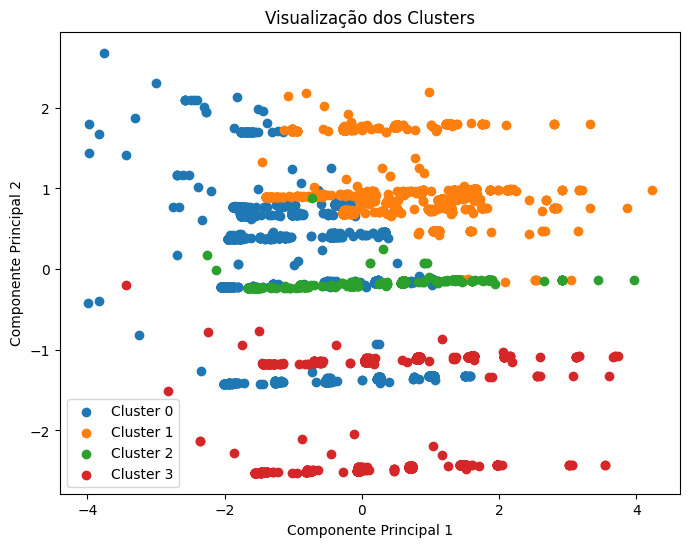

In [ ]:
# Reduzindo para 2 dimensões com PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plotando os clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(data_pca[kmeans.labels_ == cluster, 0],
                data_pca[kmeans.labels_ == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('Visualização dos Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [ ]:
score = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {score:.2f}')

#Noção básica sobre divisão de clusters

Silhouette Score: 0.27


In [ ]:
# Analisando a média das variáveis sociodemográficas por cluster, incluindo a variável Target

sociodemographic_columns = [
    'Marital status',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]
cluster_target_summary = df.groupby('Cluster')[sociodemographic_columns + ['Target']].mean()
print(cluster_target_summary)


         Marital status  Nacionality  Mother's qualification  \
Cluster                                                        
0              1.056487     2.454376               11.622595   
1              1.271291     1.418269               27.087912   
2              1.234522     1.598499               22.767355   
3              1.217233     1.718447               19.712379   

         Father's qualification  Unemployment rate  Inflation rate       GDP  \
Cluster                                                                        
0                     15.075729          12.986654        0.434264  1.109218   
1                     29.021291           9.362981        1.713805  1.522115   
2                     24.530957           9.400000       -0.800000 -3.120000   
3                     22.972087          14.083010        3.233374 -2.829466   

           Target  
Cluster            
0        1.885785  
1        1.846154  
2        1.878049  
3        1.813107  


In [ ]:
import numpy as np

# Média dos Clusters
for col in df.drop('Cluster', axis=1).columns:
    for cl in np.sort(df.Cluster.unique()):
        # Para colunas categóricas
        if df.dtypes[col] == object:
            vc = 100 * df.loc[df.Cluster == cl, col].value_counts() / (df.Cluster == cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl};{col}_{str(cat)};{cnt:5.2f}%'.replace('.', ','))
        else:
            # Para colunas numéricas
            media = df.loc[df.Cluster == cl, col].mean()
            print(f'{cl};{col};{media: .2f}'.replace('.', ','))

# Resumo geral (para todas as colunas)
for col in df.drop('Cluster', axis=1).columns:
    if df.dtypes[col] == object:
        vc = 100 * df[col].value_counts() / df.shape[0]
        for cat, cnt in vc.reset_index().values:
            print(f'All;{col}_{str(cat)};{cnt:5.2f}%'.replace('.', ','))
    else:
        media = df[col].mean()
        print(f'All;{col};{media: .2f}'.replace('.', ','))


0;Marital status; 1,06
1;Marital status; 1,27
2;Marital status; 1,23
3;Marital status; 1,22
0;Application mode; 18,50
1;Application mode; 18,77
2;Application mode; 17,40
3;Application mode; 19,65
0;Application order; 1,70
1;Application order; 1,77
2;Application order; 1,90
3;Application order; 1,61
0;Course; 8764,33
1;Course; 8924,09
2;Course; 8852,37
3;Course; 8920,71
0;Daytime/evening attendance	; 0,94
1;Daytime/evening attendance	; 0,85
2;Daytime/evening attendance	; 0,86
3;Daytime/evening attendance	; 0,89
0;Previous qualification; 5,90
1;Previous qualification; 4,16
2;Previous qualification; 2,56
3;Previous qualification; 4,03
0;Previous qualification (grade); 132,52
1;Previous qualification (grade); 131,83
2;Previous qualification (grade); 132,90
3;Previous qualification (grade); 133,98
0;Nacionality; 2,45
1;Nacionality; 1,42
2;Nacionality; 1,60
3;Nacionality; 1,72
0;Mother's qualification; 11,62
1;Mother's qualification; 27,09
2;Mother's qualification; 22,77
3;Mother's qualifica

# Tentando diferenciar variável target nos clusters

In [ ]:
# Supondo que você tenha o modelo de clustering e os dados originais
df['Cluster'] = kmeans.labels_  # Aqui 'kmeans' é o modelo que você usou para clustering


In [ ]:
# Calcule a média da variável target por cluster
mean_target_by_cluster = df.groupby('Cluster')['Target'].mean()
print(mean_target_by_cluster)


Cluster
0    1.885785
1    1.846154
2    1.878049
3    1.813107
Name: Target, dtype: float64


In [ ]:
# Contagem da variável target por cluster
target_count_by_cluster = df.groupby('Cluster')['Target'].value_counts()
print(target_count_by_cluster)


Cluster  Target
0        2         843
         1         476
         3         292
1        2         710
         1         485
         3         261
2        2         250
         1         174
         3         109
3        2         406
         1         286
         3         132
Name: count, dtype: int64


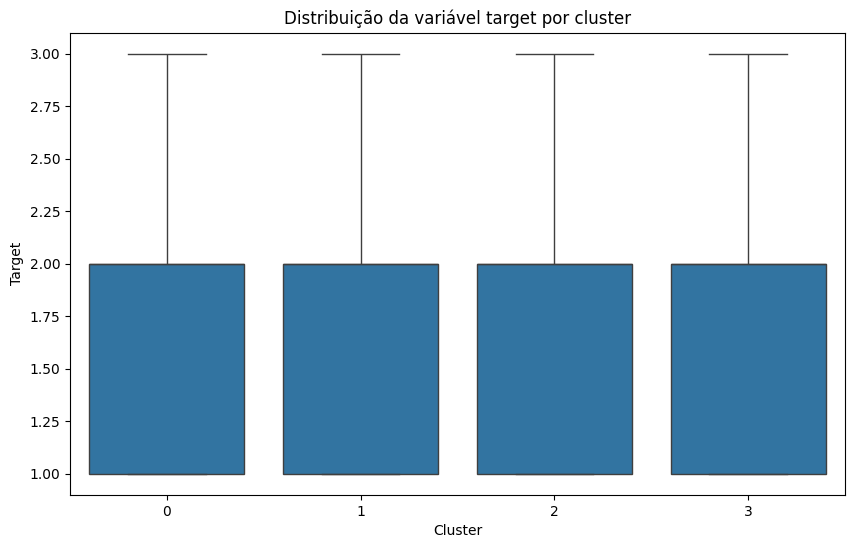

In [ ]:
# Boxplot da variável target por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Target', data=df)
plt.title('Distribuição da variável target por cluster')
plt.show()


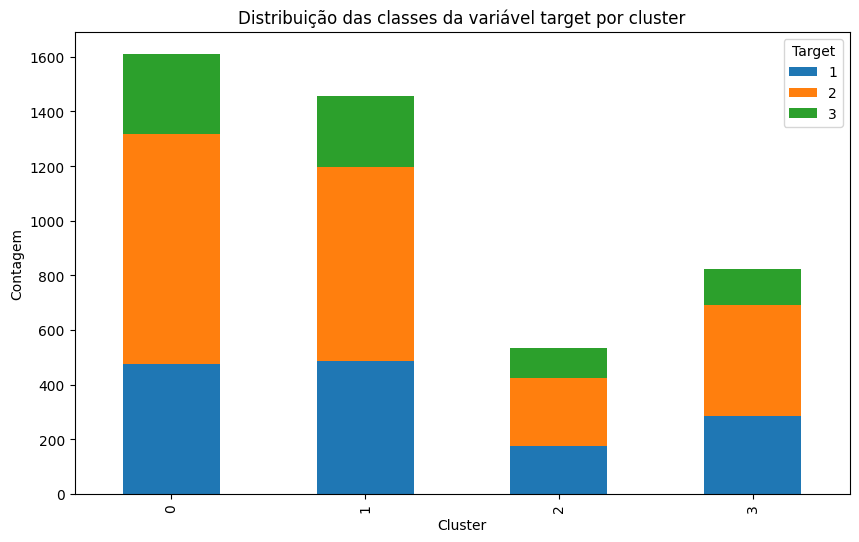

In [ ]:
# Gráfico de barras empilhadas para variável target categórica
target_count_by_cluster.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição das classes da variável target por cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()


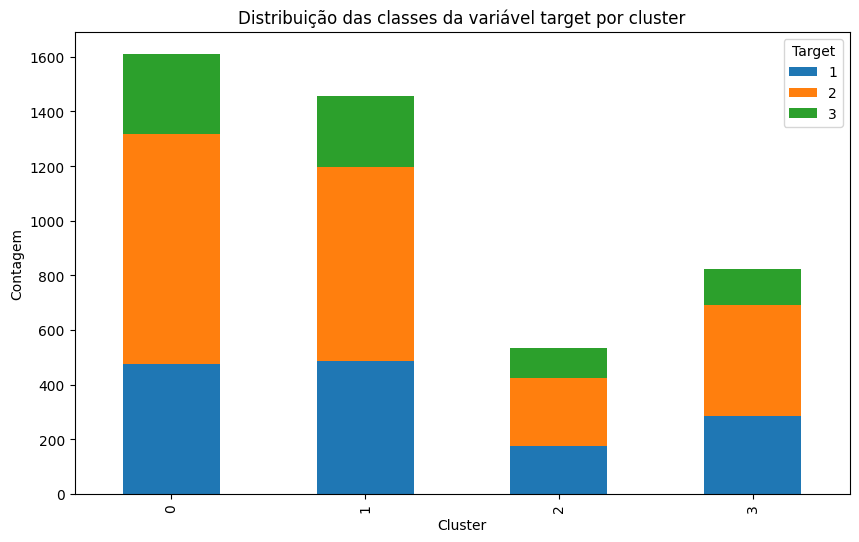

In [ ]:
# Gráfico de barras empilhadas para variável target categórica
target_count_by_cluster.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição das classes da variável target por cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()


# Teste

In [ ]:
X = df.drop(['Target'], axis=1)
y = df['Target']
X['Cluster'] = df['Cluster']  # Adicionando o cluster como uma feature

# Agora você pode usar o X para treinar seu modelo
